<h1>Full Sessionn Classifiers</h3>

<h2>Load Data</h2>

<h2>Mean Values per Respondent</h2>

In [1]:
import pandas as pd

# Load data
file_path = './datasets/facial_mean_values_per_respondent_9_3_2024_2.csv'
mean_data_from_file = df = pd.read_csv(file_path, low_memory=False)

mean_data_from_file.head()

,Unnamed: 0,Respondent,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,...,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Blink,BlinkRate,Grade
0,0,1,1.163229,0.254944,0.392873,1.440810,6.499545,0.268705,0.674075,22.516467,...,10.318576,1.194926,28.449007,0.893259,9.275257,0.482011,2.466853,0.010581,19.300548,100.0
1,1,2,1.544074,2.332416,0.481205,1.416028,0.570981,0.424949,1.505524,39.192416,...,7.177666,1.292952,55.497770,0.257819,0.701962,2.881101,0.724063,0.006212,14.053208,50.0
2,2,3,1.858315,0.574013,0.342346,2.387849,1.129676,0.135473,3.017969,35.443592,...,3.241353,0.229480,54.457716,0.036332,1.667142,1.828333,0.516913,0.002636,4.622152,55.0
3,3,4,1.167415,2.292135,0.699927,0.777726,3.815992,0.357908,0.299903,44.031246,...,10.321261,3.834506,63.257099,0.506664,4.671887,5.000366,2.341052,0.011138,19.542128,75.0
4,4,5,0.552830,3.125797,0.089759,0.258266,4.016242,1.487197,0.075457,16.701202,...,11.348795,2.433070,6.334755,0.728067,6.761394,9.708484,1.967552,0.005759,10.581087,65.0


In [2]:
# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
mean_data_from_file['Grade Group'] = mean_data_from_file['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')


<h3>Classifiers</h3>

<h4>Logistic Regression</h4>

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np


# Separating features and target variable
X = mean_data_from_file[[ 'Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']]  
y = mean_data_from_file['Grade Group'] 

# Splitting the dataset into the Training set and Hold-out Validation set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42) 

# Creating a logistic regression model pipeline with standard scaling
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])

# Applying cross-validation on the Training set
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {np.mean(scores)}')

# Training the model on the entire Training set
model.fit(X_train, y_train)

# Predicting the Hold-out Validation set results
y_pred = model.predict(X_validation)

# Calculating the accuracy on the Hold-out Validation set
accuracy = accuracy_score(y_validation, y_pred)
print(f'Hold-out validation accuracy: {accuracy}')


Cross-validation scores: [0.33333333 0.33333333 0.5        1.         0.        ]
Mean cross-validation score: 0.4333333333333333
Hold-out validation accuracy: 0.75


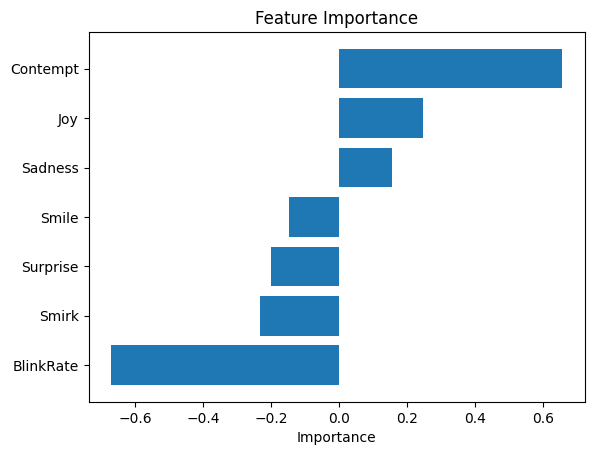

In [10]:
import matplotlib.pyplot as plt

model.fit(X_train, y_train)  

# Access the logistic regression instance from the pipeline (assuming it's the last step)
logreg = model.named_steps['logisticregression']

# Get feature names
feature_names = X.columns

# Get and display feature importances
importance = logreg.coef_[0]

# Sort features by importance
sorted_idx = np.argsort(importance)

plt.title('Feature Importance')
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.show()


In [19]:
from joblib import dump

# Save the model to file
dump(model, 'LogisticRegression_full_session_classifier.joblib')

['LogisticRegression_full_session_classifier.joblib']

<h3>Random Forest for Grade Group</h3>

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# List of columns to use as features
features_list = ['Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']  # Assuming 'Grade Group' is your target variable for classification

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier directly
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the RandomForestClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [21]:
print(rf_classifier.feature_names_in_)

['Contempt' 'Smirk' 'Surprise' 'Joy' 'Smile' 'Sadness' 'BlinkRate']


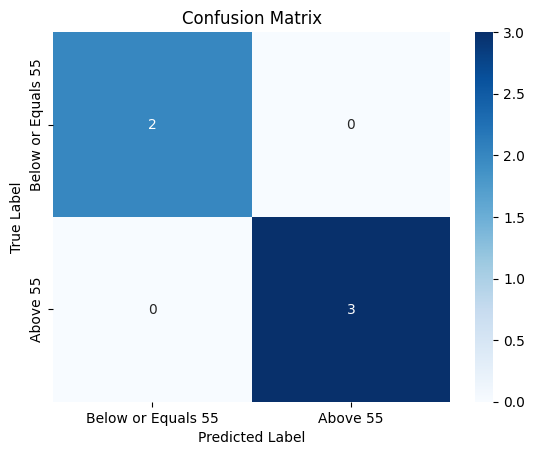

Classification Report:
               precision    recall  f1-score   support

    Above 55       1.00      1.00      1.00         2
    Below 55       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

labels = ['Below or Equals 55', 'Above 55']

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


In [16]:
from joblib import dump

# Save the model to file
dump(rf_classifier, 'rf_full_session_classifier.joblib')


['rf_full_session_classifier.joblib']

In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
# To approximate a 70/30 split, you can use about 3 folds (since 1/3 is approximately 0.33, close to 30%)
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
# Note: You might want to use scoring='accuracy' or another relevant metric based on your problem
scores = cross_val_score(rf_classifier, X, y, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Accuracy scores for each fold: [0.66666667 1.         1.         0.5        1.         1.
 0.5       ]
Mean cross-validation accuracy: 0.8095238095238094


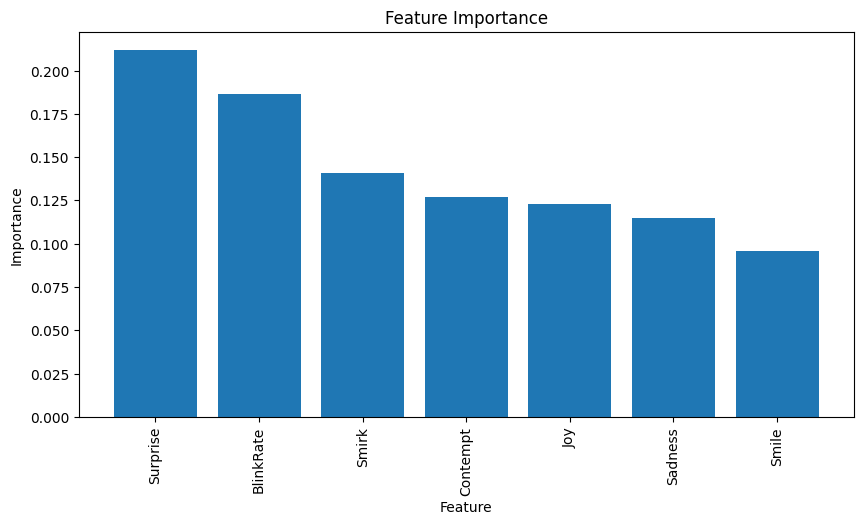

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the RandomForestClassifier
importances = rf_classifier.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features_list[i] for i in indices]

# Create the plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


<h3>Decision Tree Classifier</h3>

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# List of columns to use as features
features_list = ['Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Initialize the model directly with DecisionTreeClassifier, without StandardScaler
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6


In [31]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
# To approximate a 70/30 split, you can use about 3 folds (since 1/3 is approximately 0.33, close to 30%)
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
# Note: You might want to use scoring='accuracy' or another relevant metric based on your problem
scores = cross_val_score(dt_classifier, X, y, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Accuracy scores for each fold: [0.66666667 0.         1.         0.5        0.5        1.
 0.5       ]
Mean cross-validation accuracy: 0.5952380952380951


In [28]:
from sklearn.tree import export_text

tree_rules = export_text(dt_classifier, feature_names=['Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate'])
print(tree_rules)

|--- Sadness <= 0.47
|   |--- Surprise <= 1.09
|   |   |--- class: Above 55
|   |--- Surprise >  1.09
|   |   |--- Sadness <= 0.43
|   |   |   |--- class: Below 55
|   |   |--- Sadness >  0.43
|   |   |   |--- class: Above 55
|--- Sadness >  0.47
|   |--- class: Below 55



In [32]:
from joblib import dump

# Save the model to file
dump(dt_classifier, 'dt_classifier.joblib')


['dt_classifier.joblib']

<h3>Naive Bayes</h3>

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# List of columns to use as features
features_list = [ 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fitting the model on the training data
gnb.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [67]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
# To approximate a 70/30 split, you can use about 3 folds (since 1/3 is approximately 0.33, close to 30%)
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
# Note: You might want to use scoring='accuracy' or another relevant metric based on your problem
scores = cross_val_score(gnb, X, y, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Accuracy scores for each fold: [0.33333333 0.33333333 0.5        1.         0.5        1.
 0.5       ]
Mean cross-validation accuracy: 0.5952380952380951


In [68]:
# After fitting a GaussianNB model `gnb`:
print("Mean of features per class:", gnb.theta_)


Mean of features per class: [[ 3.61920871  2.09240636  1.73068044  3.08149425  0.7371144  14.15807348]
 [ 4.15193851  1.29378842  1.96593892  3.0377605   1.027397   10.30487074]]


In [69]:
from joblib import dump

# Save the model to file
dump(gnb, 'NB_model.joblib')


['NB_model.joblib']